<a href="https://colab.research.google.com/github/JankovitsA/FAKT_MI/blob/main/faktprog_hf3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
ho = pd.read_csv('/content/drive/My Drive/progfakt/sample_data/yearly_monthly_averages.csv') #Szülővárosom, Pécs adatait kértem le, mert szívemnek igencsak kedves
nap=pd.read_csv('/content/drive/My Drive/progfakt/sample_data/weather_data_24hr.csv')
ora=pd.read_csv('/content/drive/My Drive/progfakt/sample_data/weather_data_1hr.csv')


In [24]:
#ho.head()
#nap.head()
ora.head()

,loc_id,date,time,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,...,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,1,2019-06-01,0,no,16,61,6,10,228,SW,...,16,61,12,54,16,61,7,12,16,61
1,1,2019-06-01,100,no,16,60,6,9,230,SW,...,16,60,12,53,16,60,7,11,16,60
2,1,2019-06-01,200,no,15,59,5,9,233,SW,...,15,59,11,53,15,59,6,10,15,59
3,1,2019-06-01,300,no,15,58,5,8,235,SW,...,15,58,11,52,14,58,6,9,14,58
4,1,2019-06-01,400,no,15,59,4,7,229,SW,...,15,59,11,52,15,59,5,8,15,59


In [10]:
#Felesleges változók kiszűrése
#hónap: loc_id, maxtempf (0C is ugyanezt tudja), mintempf, avgtempf, raininches (ua. mint a mm-ben adott), maxwindspeedMiles (km-ben is adott), avgwindspeedMiles, avgwindgustMiles,
#visibilityMiles, pressureInches
#hónap és óra hasonlóan

In [22]:
hodf=ho.copy()

In [ ]:
dobhato=['loc_id', 'year', 'month', 'maxtempF', 'mintempF', 'avgtempF', 'rainInches', 'maxwindspeedMiles', 'avgwindspeedMiles', 'avgwindgustMiles', 'visibilityMiles', 'pressureInches']
hodf=hodf.drop(dobhato, axis=1)
hodf.head()

In [ ]:
oradf=ora.copy()
dobhato2=['loc_id', 'date', 'time', 'isdaytime','weatherIconUrl','precipInches', 'tempF', 'visibilityMiles', 'pressureInches','WindChillF', 'HeatIndexF','DewPointF','WindGustMiles','FeelsLikeF']
oradf=oradf.drop(dobhato2, axis=1)
oradf.head()

In [ ]:
#weatherDesc és winddir16point átalakítása számmá
laberer=LabelEncoder()
oradf.winddir16point=laberer.fit_transform(oradf.winddir16point)
oradf.weatherDesc=laberer.fit_transform(oradf.weatherDesc)
oradf.head()

In [36]:
napdf=nap.copy()
dobhato3=['loc_id', 'date', 'maxtempF', 'mintempF', 'avgtempF','totalprecipIn','windspeedMiles', 'weatherIconUrl', 'visibilityMiles', 'pressureInches','WindChillF', 'HeatIndexF','DewPointF','WindGustMiles','FeelsLikeF','sunrise','sunset','moonrise','moonset']
napdf=napdf.drop(dobhato3, axis=1)
napdf.head()

,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,winddir16point,weatherCode,weatherDesc,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC
0,26,15,22,0.0,10,8.7,200,SSW,116,Partly cloudy,61,10,1020,7,21,12,21,12,21
1,24,17,22,0.5,19,3.3,215,SW,122,Overcast,66,9,1011,61,21,13,20,23,20
2,20,14,18,0.5,17,5.1,235,SW,353,Light rain shower,57,10,1012,42,17,8,16,20,16
3,17,14,16,10.7,12,5.1,164,SSE,353,Light rain shower,71,9,1007,54,16,10,16,14,16
4,19,13,17,0.1,13,6.9,236,SW,122,Overcast,64,10,1006,65,16,9,15,17,15


In [37]:
#weatherDesc és winddir16point átalakítása számmá
laberer=LabelEncoder()
napdf.winddir16point=laberer.fit_transform(napdf.winddir16point)
napdf.weatherDesc=laberer.fit_transform(napdf.weatherDesc)
napdf.head()

,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,winddir16point,weatherCode,weatherDesc,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC
0,26,15,22,0.0,10,8.7,200,11,116,7,61,10,1020,7,21,12,21,12,21
1,24,17,22,0.5,19,3.3,215,12,122,6,66,9,1011,61,21,13,20,23,20
2,20,14,18,0.5,17,5.1,235,12,353,2,57,10,1012,42,17,8,16,20,16
3,17,14,16,10.7,12,5.1,164,10,353,2,71,9,1007,54,16,10,16,14,16
4,19,13,17,0.1,13,6.9,236,12,122,6,64,10,1006,65,16,9,15,17,15


In [64]:
##Prediktálás
#a probléma: mindig a következő y értéket prediktáljuk, tehát le kell vágni az y (magyarázandó változó) elejét és az x (magyarázó változók) végét
#tehát az y elejének a levágása
napydf=napdf['avgtempC'].copy()
napydf=napydf.drop(napydf.index[range(1)])
napydf.shape

(60,)

In [62]:
#és a többi végéé
napxdf=napdf.copy().drop('avgtempC',axis=1)
napxdf=napxdf.drop(axis=0,index=(napxdf.shape[0]-1))
napxdf.shape

(60, 18)

In [79]:
#
from tensorflow import keras
x1_train, x1_test, y1_train, y1_test = train_test_split(napxdf,napydf,test_size=0.1,shuffle=True) #shuffle: összekeveri az értékeket

In [80]:
normalizer=StandardScaler()
normalizer.fit(x1_train)
x1_train = normalizer.transform(x1_train)
x1_test = normalizer.transform(x1_test)

In [81]:
##Architektúra létrehozása
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy


In [82]:
input1 = Input(shape=(x1_train.shape[1]))
x = Dense(32, activation='relu')(input1)
x = Dense(64, activation='relu')(x)
output1 = Dense(1, activation='sigmoid')(x)

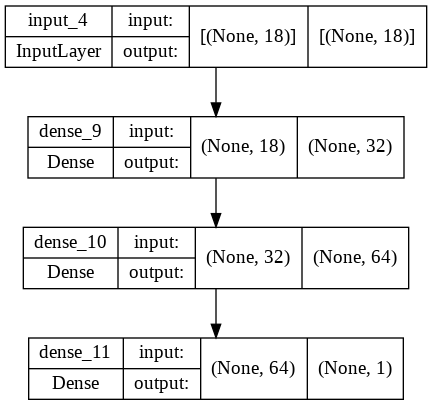

In [83]:
model1 = keras.Model(input1, output1)
plot_model(model1, show_shapes=True)

In [87]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)
model.compile(optimizer='adam',
    loss='MSE')

In [ ]:
model.fit(x=x1_train, y=y1_train, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback] )

In [89]:
model.evaluate(x1_test, y1_test) #elég nagy érték, de a kevés adat ezt megmagyarázza.

1/1 [==============================] - 0s 42ms/step - loss: 307.5017


307.501708984375

In [ ]:
predictions1 = model.predict(x1_test[:2]) #https://www.tensorflow.org/guide/keras/train_and_evaluate
predictions1

A nagyobb pontossághoz órákon is vizsgálva:

In [98]:
oraydf=oradf['tempC'].copy() #az előzőhöz hasonlóan dobjuk ki az első értéket
oraydf=oraydf.drop(oraydf.index[range(1)])
oraydf.shape

(1463,)

In [100]:
#és a többi végét
oraxdf=oradf.copy().drop('tempC',axis=1)
oraxdf=oraxdf.drop(axis=0,index=(oraxdf.shape[0]-1))
oraxdf.shape

(1463, 16)

In [101]:
#
from tensorflow import keras
x2_train, x2_test, y2_train, y2_test = train_test_split(oraxdf,oraydf,test_size=0.1,shuffle=True) #shuffle: összekeveri az értékeket

In [102]:
#Normalizálás
normalizer=StandardScaler()
normalizer.fit(x2_train)
x2_train = normalizer.transform(x2_train)
x2_test = normalizer.transform(x2_test)

In [103]:
##Architektúra létrehozása
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy


In [104]:
input2 = Input(shape=(x2_train.shape[1]))
x = Dense(32, activation='relu')(input2)
x = Dense(64, activation='relu')(x)
output2 = Dense(1, activation='sigmoid')(x)

In [ ]:
model2 = keras.Model(input2, output2)
plot_model(model2, show_shapes=True) #ez igazából fölösleges, de akkor már legyen itt

In [108]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(patience=20, restore_best_weights=True)
model2.compile(optimizer='adam',
    loss='MSE')


In [109]:
model2.fit(x=x2_train, y=y2_train, epochs=500, validation_split=0.1, callbacks=[early_stopping_callback] )

Epoch 1/500
37/37 [==============================] - 1s 13ms/step - loss: 346.5475 - val_loss: 334.8328
Epoch 2/500
37/37 [==============================] - 0s 5ms/step - loss: 341.5321 - val_loss: 333.7425
Epoch 3/500
37/37 [==============================] - 0s 5ms/step - loss: 341.0946 - val_loss: 333.5959
Epoch 4/500
37/37 [==============================] - 0s 5ms/step - loss: 341.0120 - val_loss: 333.5453
Epoch 5/500
37/37 [==============================] - 0s 5ms/step - loss: 340.9792 - val_loss: 333.5219
Epoch 6/500
37/37 [==============================] - 0s 6ms/step - loss: 340.9627 - val_loss: 333.5089
Epoch 7/500
37/37 [==============================] - 0s 6ms/step - loss: 340.9532 - val_loss: 333.5010
Epoch 8/500
37/37 [==============================] - 0s 5ms/step - loss: 340.9473 - val_loss: 333.4956
Epoch 9/500
37/37 [==============================] - 0s 5ms/step - loss: 340.9433 - val_loss: 333.4919
Epoch 10/500
37/37 [==============================] - 0s 5ms/step - loss

In [110]:
model2.evaluate(x2_test, y2_test)

5/5 [==============================] - 0s 3ms/step - loss: 342.9660


342.9659729003906